**To apply gradient descent for optimizing a logistic regression model for binary classification, we'll follow these steps:**

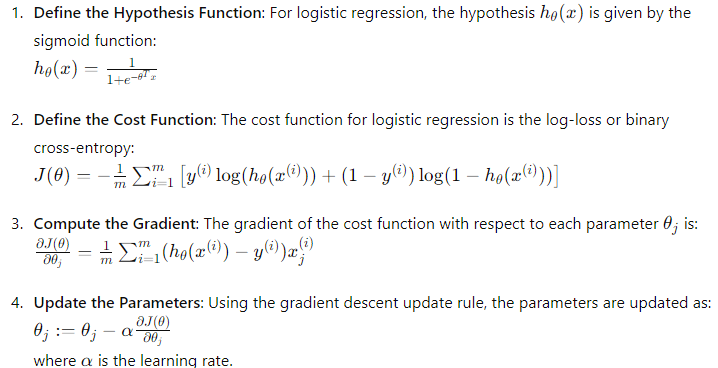

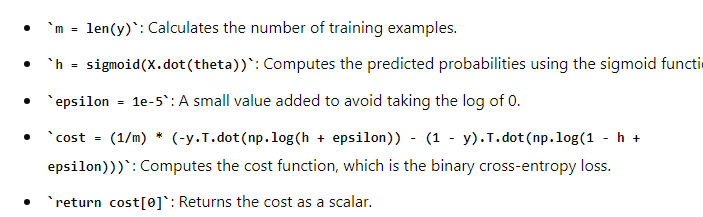

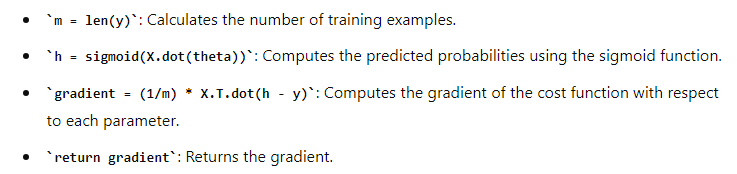

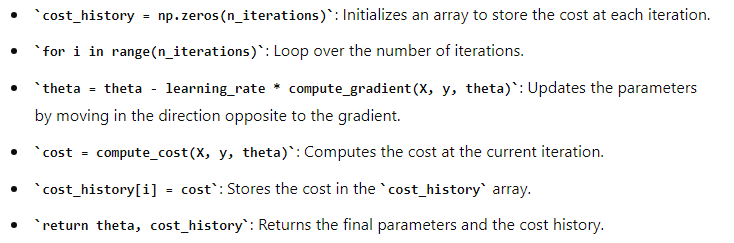

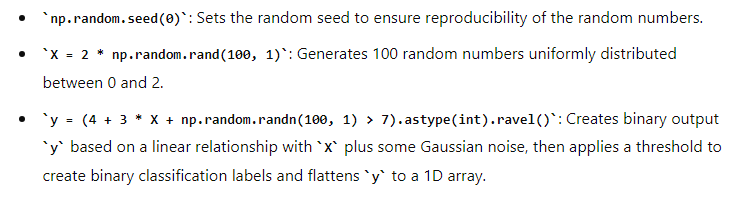

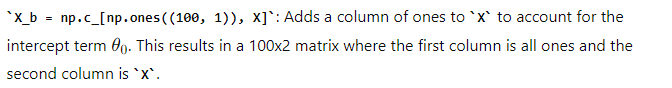

In [ ]:
#numpy is imported for numerical operations, especially for handling arrays and matrices.
#matplotlib.pyplot is imported for plotting graphs.
import numpy as np
import matplotlib.pyplot as plt

########## Sigmoid function######
#The sigmoid function calculates the sigmoid of z,
# which is used to map predicted values to probabilities between 0 and 1 in logistic regression.
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

###########Cost function:#########
#m = len(y):
#Calculates the number of training examples.
#h = sigmoid(X.dot(theta)):
# Computes the predicted probabilities using the sigmoid function.
#epsilon = 1e-5:
#A small value added to avoid taking the log of 0.
#cost = (1/m) * (-y.T.dot(np.log(h + epsilon)) - (1 - y).T.dot(np.log(1 - h + epsilon))):
# Computes the cost function, which is the binary cross-entropy loss.
#return cost[0]:
# Returns the cost as a scalar.#
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    epsilon = 1e-5  # To avoid log(0) issues
    cost = (1/m) * (-y.T.dot(np.log(h + epsilon)) - (1 - y).T.dot(np.log(1 - h + epsilon)))
    return cost[0]  # Return as scalar

############Gradient function########
#cost_history = np.zeros(n_iterations):
#Initializes an array to store the cost at each iteration.
#for i in range(n_iterations):
# Loop over the number of iterations.
#theta = theta - learning_rate * compute_gradient(X, y, theta):
#Updates the parameters by moving in the direction opposite to the gradient.
#cost = compute_cost(X, y, theta):
#Computes the cost at the current iteration.
#cost_history[i] = cost:
#Stores the cost in the cost_history array.
#return theta, cost_history:
#Returns the final parameters and the cost history.

def compute_gradient(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    gradient = (1/m) * X.T.dot(h - y)
    return gradient

# Gradient Descent
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)  # Initialize cost history array
    for i in range(n_iterations):
        theta = theta - learning_rate * compute_gradient(X, y, theta)
        cost = compute_cost(X, y, theta)
        cost_history[i] = cost  # Store cost for each iteration
    return theta, cost_history

# Generate some sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = (4 + 3 * X + np.random.randn(100, 1) > 7).astype(int).ravel()  # Binary classification and flatten y

# Add the intercept term to X
X_b = np.c_[np.ones((100, 1)), X]

# Gradient Descent parameters
learning_rate = 0.1 #The step size for each iteration of gradient descent.
n_iterations = 1000 #The number of iterations to run gradient descent.

# Initialize theta randomly:
theta = np.random.randn(2, 1)

# Run Gradient Descent:Runs the gradient descent algorithm to optimize the parameters, returning the final parameters and the cost history.
theta, cost_history = gradient_descent(X_b, y, theta, learning_rate, n_iterations)



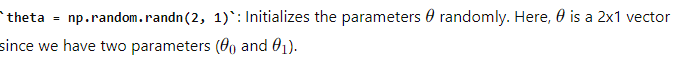

Prints the final parameters
𝜃 found by gradient descent.

In [ ]:
print("Theta found by gradient descent:")
print(theta)

Theta found by gradient descent:
[[-3.1742741   3.63311066  3.63311066 -3.1742741   3.63311066  3.63311066
   3.63311066  3.63311066  3.63311066  3.63311066  3.63311066  3.63311066
   3.63311066  3.63311066 -3.1742741  -3.1742741  -3.1742741   3.63311066
   3.63311066  3.63311066  3.63311066  3.63311066 -3.1742741   3.63311066
  -3.1742741   3.63311066 -3.1742741   3.63311066  3.63311066  3.63311066
   3.63311066  3.63311066 -3.1742741   3.63311066 -3.1742741   3.63311066
   3.63311066  3.63311066  3.63311066  3.63311066 -3.1742741  -3.1742741
   3.63311066 -3.1742741   3.63311066  3.63311066 -3.1742741  -3.1742741
  -3.1742741  -3.1742741  -3.1742741   3.63311066  3.63311066 -3.1742741
  -3.1742741  -3.1742741   3.63311066 -3.1742741   3.63311066 -3.1742741
  -3.1742741  -3.1742741   3.63311066 -3.1742741   3.63311066  3.63311066
   3.63311066 -3.1742741   3.63311066 -3.1742741   3.63311066  3.63311066
   3.63311066 -3.1742741   3.63311066 -3.1742741  -3.1742741  -3.1742741
  -3.17427

plots the cost function history over the iterations.

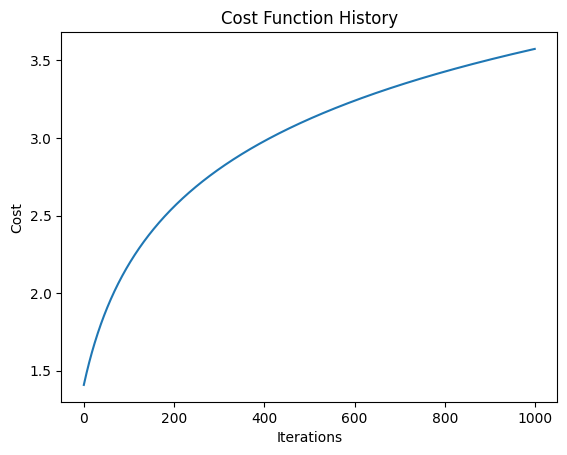

In [ ]:
# Plotting the cost function history
plt.plot(range(n_iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function History")
plt.show()



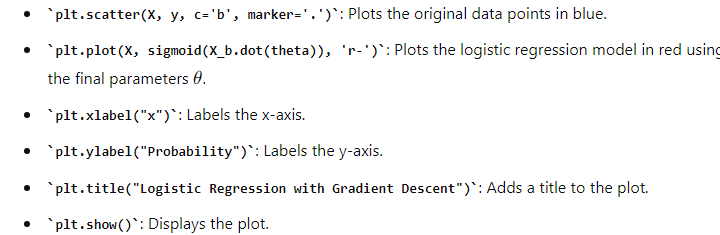

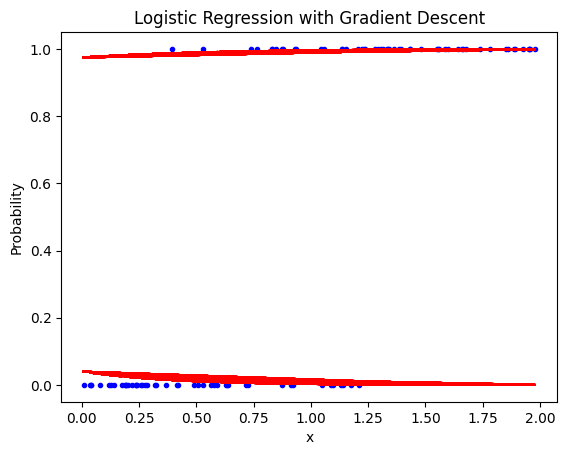

In [ ]:
# Plotting the results
plt.scatter(X, y, c='b', marker='.')
plt.plot(X, sigmoid(X_b.dot(theta)), 'r-')
plt.xlabel("x")
plt.ylabel("Probability")
plt.title("Logistic Regression with Gradient Descent")
plt.show()